In [33]:
# Import required libraries
# Data Handling
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Feature Selection / Preprocessing
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.feature_selection import VarianceThreshold
from sklearn.metrics import roc_curve, auc as sk_auc, RocCurveDisplay
from sklearn.preprocessing import label_binarize
import shap

# Set visualization style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")


# Machine Learning Models
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

# Model Evaluation
from sklearn.metrics import accuracy_score, f1_score,  classification_report, confusion_matrix
from sklearn.model_selection import StratifiedKFold, cross_validate, train_test_split

# Privacy Techniques
from numpy.random import normal, laplace

# Warnings and Display Settings
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns", None)


In [34]:
# Load and clean columns
def load_clean_csv(path, usecols):
    raw_df = pd.read_csv(path)
    raw_df.columns = raw_df.columns.str.strip()  # remove leading/trailing spaces
    return raw_df[usecols]

# Column names without leading spaces after cleaning
use_cols = [
    'Flow Duration',
    'Total Fwd Packets',
    'Total Backward Packets',
    'Total Length of Fwd Packets',
    'Total Length of Bwd Packets',
    'Fwd Packet Length Max',
    'Fwd Packet Length Min',
    'Fwd Packet Length Mean',
    'Fwd Packet Length Std',
    'Bwd Packet Length Max',
    'Bwd Packet Length Min',
    'Bwd Packet Length Mean',
    'Bwd Packet Length Std',
    'Flow IAT Mean',
    'Flow IAT Std',
    'Flow IAT Max',
    'Flow IAT Min',
    'Fwd IAT Mean',
    'Fwd IAT Std',
    'Fwd IAT Max',
    'Fwd IAT Min',
    'Bwd IAT Mean',
    'Bwd IAT Std',
    'Bwd IAT Max',
    'Bwd IAT Min',
    'Fwd Packets/s',
    'Bwd Packets/s',
    'Min Packet Length',
    'Max Packet Length',
    'Packet Length Mean',
    'Packet Length Std',
    'Packet Length Variance',
    'Average Packet Size',
    'Avg Fwd Segment Size',
    'Avg Bwd Segment Size',
    'Active Mean',
    'Active Std',
    'Active Max',
    'Active Min',
    'Idle Mean',
    'Idle Std',
    'Idle Max',
    'Idle Min',
    'Label'  # Target
]

# Load each file with cleaned column names
df1 = load_clean_csv('Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv', use_cols)
df2 = load_clean_csv('Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv', use_cols)
df3 = load_clean_csv('Friday-WorkingHours-Morning.pcap_ISCX.csv', use_cols)
df4 = load_clean_csv('Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv', use_cols)
df5 = load_clean_csv('Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv', use_cols)
df6 = load_clean_csv('Tuesday-WorkingHours.pcap_ISCX.csv', use_cols)
df7 = load_clean_csv('Wednesday-workingHours.pcap_ISCX.csv', use_cols)
df8 = load_clean_csv('Monday-WorkingHours.pcap_ISCX.csv', use_cols)

# Combine
df = pd.concat([df1, df2, df3, df4, df5, df6, df7, df8], ignore_index=True)

print("Loaded shape:", df.shape)
df.head()


Loaded shape: (2830743, 44)


,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,3,2,0,12,0,6,6,6.0,0.0,0,0,0.0,0.0,3.0,0.0,3,3,3.0,0.0,3,3,0.0,0.0,0,0,666666.666700,0.000000,6,6,6.0,0.0,0.0,9.0,6.0,0.0,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,109,1,1,6,6,6,6,6.0,0.0,6,6,6.0,0.0,109.0,0.0,109,109,0.0,0.0,0,0,0.0,0.0,0,0,9174.311927,9174.311927,6,6,6.0,0.0,0.0,9.0,6.0,6.0,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,52,1,1,6,6,6,6,6.0,0.0,6,6,6.0,0.0,52.0,0.0,52,52,0.0,0.0,0,0,0.0,0.0,0,0,19230.769230,19230.769230,6,6,6.0,0.0,0.0,9.0,6.0,6.0,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,34,1,1,6,6,6,6,6.0,0.0,6,6,6.0,0.0,34.0,0.0,34,34,0.0,0.0,0,0,0.0,0.0,0,0,29411.764710,29411.764710,6,6,6.0,0.0,0.0,9.0,6.0,6.0,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,3,2,0,12,0,6,6,6.0,0.0,0,0,0.0,0.0,3.0,0.0,3,3,3.0,0.0,3,3,0.0,0.0,0,0,666666.666700,0.000000,6,6,6.0,0.0,0.0,9.0,6.0,0.0,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


# 1. Dataset Inspection and Initial Preparation

In [35]:
# 1.1 Inspect Dataset Structure
print("Dataset shape:", df.shape)
print("\nColumn types:\n", df.dtypes.value_counts())

Dataset shape: (2830743, 44)

Column types:
 float64    22
int64      21
object      1
Name: count, dtype: int64


In [36]:
# 1.2 Check for Missing Values
missing = df.isnull().sum()
missing_cols = missing[missing > 0]
print(f"\nColumns with missing values: {len(missing_cols)}")
print(missing_cols)



Columns with missing values: 0
Series([], dtype: int64)


In [37]:
# 1.3  Summary Statistics of Label Distribution
print("\nClass distribution:")
print(df['Label'].value_counts(normalize=True) * 100)


Class distribution:
Label
BENIGN                        80.300366
DoS Hulk                       8.162981
PortScan                       5.614427
DDoS                           4.522735
DoS GoldenEye                  0.363615
FTP-Patator                    0.280421
SSH-Patator                    0.208320
DoS slowloris                  0.204752
DoS Slowhttptest               0.194260
Bot                            0.069452
Web Attack � Brute Force       0.053237
Web Attack � XSS               0.023033
Infiltration                   0.001272
Web Attack � Sql Injection     0.000742
Heartbleed                     0.000389
Name: proportion, dtype: float64


In [38]:
# Convert categorical class labels to integers for ML compatibility

le = LabelEncoder()
df['Label_enc'] = le.fit_transform(df['Label'])

# Reverse map for reference
label_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("\n Label encoding map:")
for label, code in label_mapping.items():
    print(f"{label} → {code}")


 Label encoding map:
BENIGN → 0
Bot → 1
DDoS → 2
DoS GoldenEye → 3
DoS Hulk → 4
DoS Slowhttptest → 5
DoS slowloris → 6
FTP-Patator → 7
Heartbleed → 8
Infiltration → 9
PortScan → 10
SSH-Patator → 11
Web Attack � Brute Force → 12
Web Attack � Sql Injection → 13
Web Attack � XSS → 14


In [39]:
# Downsample Only Classes with Enough Samples

# Parameters
sample_frac = 0.07
min_class_size = 30
dfs = []

# Loop over each class
for label_code in df['Label_enc'].unique():
    class_subset = df[df['Label_enc'] == label_code]
    count = len(class_subset)
    
    if count < min_class_size:
        continue  # skip rare class entirely
    
    sample_size = int(sample_frac * count)
    sample = class_subset.sample(n=sample_size, random_state=42)
    dfs.append(sample)

# Concatenate all samples
df_sampled = pd.concat(dfs).reset_index(drop=True)

print(f"Sampled dataset shape: {df_sampled.shape}")
print("Class distribution in sampled data:")
print(df_sampled['Label_enc'].value_counts(normalize=True).sort_index())

Sampled dataset shape: (198142, 45)
Class distribution in sampled data:
Label_enc
0     0.803040
1     0.000691
2     0.045225
3     0.003634
4     0.081633
5     0.001938
6     0.002044
7     0.002801
9     0.000010
10    0.056147
11    0.002079
12    0.000530
14    0.000227
Name: proportion, dtype: float64


# 2. Variance and Correlation Filtering

In [40]:
# 2.1 Remove low-variance features
# Drop label temporarily to isolate features
feature_only_df = df_sampled.drop(columns=['Label'])
vt = VarianceThreshold(threshold=0.01)
vt.fit(feature_only_df)

low_var = feature_only_df.columns[~vt.get_support()]
print(f"Dropping {len(low_var)} low-variance features:")
print(list(low_var))

df = df_sampled.drop(columns=low_var)

Dropping 0 low-variance features:
[]


# 3. Train-Test Split, and Feature Scaling



In [41]:
# 3.1 Features and Labels
# Drop the original 'Label' column and keep numeric features
X = df_sampled.drop(columns=['Label', 'Label_enc'])
y = df_sampled['Label_enc']

print("Feature matrix shape:", X.shape)
print("Target vector shape:", y.shape)

Feature matrix shape: (198142, 43)
Target vector shape: (198142,)


In [42]:
# 3.2 Stratified Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)

print(f"\n Train set: {X_train.shape}")
print(f" Test set: {X_test.shape}")
print("Class distribution in test set:")
print(y_test.value_counts(normalize=True).sort_index())


 Train set: (158513, 43)
 Test set: (39629, 43)
Class distribution in test set:
Label_enc
0     0.803048
1     0.000681
2     0.045219
3     0.003634
4     0.081632
5     0.001943
6     0.002044
7     0.002801
10    0.056146
11    0.002094
12    0.000530
14    0.000227
Name: proportion, dtype: float64


## 3.3 Feature Selection (SelectKBest with Mutual Information)

In [43]:
# Feature selection to reduce overfitting (keep top-K informative features)
from sklearn.feature_selection import mutual_info_classif, SelectKBest

K = min(25, X_train.shape[1])  # cap at 25 or total features if fewer
selector = SelectKBest(score_func=mutual_info_classif, k=K)
selector.fit(X_train, y_train)

X_train_sel = selector.transform(X_train)
X_test_sel = selector.transform(X_test)

# Keep the selected feature names for reporting
try:
    selected_mask = selector.get_support()
    selected_features = [col for col, keep in zip(X_train.columns, selected_mask) if keep]
except Exception:
    selected_features = list(range(X_train_sel.shape[1]))

print(f"Selected top-{K} features (by mutual information):", selected_features[:10], "... (truncated)")


Selected top-25 features (by mutual information): ['Flow Duration', 'Total Length of Fwd Packets', 'Total Length of Bwd Packets', 'Fwd Packet Length Max', 'Fwd Packet Length Mean', 'Fwd Packet Length Std', 'Bwd Packet Length Max', 'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow IAT Mean'] ... (truncated)


In [ ]:
# Random Forest with regularization + cross-validation + richer metrics

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_validate, StratifiedKFold
import numpy as np
import pandas as pd
import gc  # For garbage collection

# Most Conservative (Slowest but safest)
print("Training Random Forest with memory-optimized settings...")
rf = RandomForestClassifier(
    n_estimators=300,
    max_depth=15,
    min_samples_split=10,
    min_samples_leaf=5,
    max_features='sqrt',
    class_weight='balanced',
    random_state=42,
    n_jobs=4,  
    verbose=0
)

# Cross-validation with reduced parallelism
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scoring = {'acc': 'accuracy', 'f1w': 'f1_weighted', 'precw': 'precision_weighted', 'recw': 'recall_weighted'}

print("Running cross-validation (this may take 5-10 minutes)...")
cv_results = cross_validate(
    rf, X_train_sel, y_train, 
    cv=cv, 
    scoring=scoring, 
    n_jobs=1,  # Changed from -1 to 1 (sequential CV folds)
    return_train_score=True,
    verbose=1
)

print("CV Train Acc (mean±std): %.4f ± %.4f" % (cv_results['train_acc'].mean(), cv_results['train_acc'].std()))
print("CV Val   Acc (mean±std): %.4f ± %.4f" % (cv_results['test_acc'].mean(), cv_results['test_acc'].std()))
print("CV Val   F1w (mean±std): %.4f ± %.4f" % (cv_results['test_f1w'].mean(), cv_results['test_f1w'].std()))

# Clear memory before final training
del cv_results
gc.collect()

# Fit on full training set and evaluate on held-out test
print("\nTraining final model on full training set...")
rf.fit(X_train_sel, y_train)
y_pred = rf.predict(X_test_sel)

acc = accuracy_score(y_test, y_pred)
f1w = f1_score(y_test, y_pred, average='weighted')
precw = precision_score(y_test, y_pred, average='weighted', zero_division=0)
recw = recall_score(y_test, y_pred, average='weighted')

print("\nHeld-out Test Metrics:")
print(f"Accuracy: {acc:.4f}  |  F1-weighted: {f1w:.4f}  |  Precision-weighted: {precw:.4f}  |  Recall-weighted: {recw:.4f}")
print("\nClassification Report (Held-out Test):\n", classification_report(y_test, y_pred, zero_division=0))

cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm, index=np.unique(y_test), columns=np.unique(y_test))
print("\nConfusion Matrix (Held-out Test):\n", cm_df)



## 4.1 Logistic Regression 

In [ ]:
# Logistic Regression with scaling and selected features
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, f1_score

lr_pipeline = Pipeline(steps=[
    ('scaler', StandardScaler(with_mean=True, with_std=True)),
    ('clf', LogisticRegression(max_iter=2000, n_jobs=-1 if hasattr(LogisticRegression(), 'n_jobs') else None, class_weight='balanced', solver='lbfgs'))
])

# Fit on selected features
lr_pipeline.fit(X_train_sel, y_train)
y_pred_lr = lr_pipeline.predict(X_test_sel)
print("LogReg Accuracy:", accuracy_score(y_test, y_pred_lr))
print("LogReg F1-weighted:", f1_score(y_test, y_pred_lr, average='weighted'))


LogReg Accuracy: 0.6782154482828232
LogReg F1-weighted: 0.7657285665533904


In [ ]:
from sklearn.metrics import classification_report, precision_score, recall_score

# Classification report for Logistic Regression
print("\nClassification Report (Logistic Regression):\n",
      classification_report(y_test, y_pred_lr, zero_division=0))

# Weighted metrics
precw_lr = precision_score(y_test, y_pred_lr, average='weighted', zero_division=0)
recw_lr  = recall_score(y_test, y_pred_lr, average='weighted', zero_division=0)
f1w_lr   = f1_score(y_test, y_pred_lr, average='weighted')
acc_lr   = accuracy_score(y_test, y_pred_lr)

print(f"\nHeld-out Test (LR): Accuracy: {acc_lr:.4f} | F1-weighted: {f1w_lr:.4f} | "
      f"Precision-weighted: {precw_lr:.4f} | Recall-weighted: {recw_lr:.4f}")



Classification Report (Logistic Regression):
               precision    recall  f1-score   support

           0       1.00      0.62      0.77     31824
           1       0.01      0.63      0.02        27
           2       0.88      0.97      0.92      1792
           3       0.26      0.94      0.41       144
           4       0.81      0.80      0.80      3235
           5       0.30      0.94      0.45        77
           6       0.12      0.85      0.21        81
           7       0.02      0.97      0.04       111
           9       0.00      0.00      0.00         0
          10       0.51      0.99      0.67      2225
          11       0.08      0.51      0.13        83
          12       0.01      0.05      0.01        21
          14       0.01      1.00      0.03         9

    accuracy                           0.68     39629
   macro avg       0.31      0.71      0.34     39629
weighted avg       0.94      0.68      0.77     39629


Held-out Test (LR): Accuracy: 0

## 4.2 XGBoost (Regularized + CV + Early Stopping)

In [ ]:
# 4.2 XGBoost (Regularized + CV + Early Stopping) — legacy-compatible via xgboost.cv + xgboost.train

import xgboost as xgb
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import (
    accuracy_score, f1_score, precision_score, recall_score,
    classification_report, confusion_matrix
)
import numpy as np
import pandas as pd

# Robust contiguous label encoding for XGB (multiclass)
le_xgb_mc = LabelEncoder()
y_train_mc = le_xgb_mc.fit_transform(y_train)
y_test_mc  = le_xgb_mc.transform(y_test)
num_classes_mc = len(le_xgb_mc.classes_)
print(f"XGB Multiclass: encoded {num_classes_mc} classes -> {list(le_xgb_mc.classes_)[:8]}{'...' if num_classes_mc>8 else ''}")

# XGB params (regularized, stable)
params = {
    'objective': 'multi:softprob',
    'num_class': num_classes_mc,
    'eta': 0.05,                 # learning_rate
    'max_depth': 8,
    'min_child_weight': 3,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'lambda': 1.0,               # L2
    'alpha': 0.0,                # L1
    'tree_method': 'hist',
    'eval_metric': 'mlogloss',
    'nthread': -1,
    'seed': 42
}

# Build DMatrices
dtrain = xgb.DMatrix(X_train_sel, label=y_train_mc)
dtest  = xgb.DMatrix(X_test_sel,  label=y_test_mc)

# Cross-validated early stopping to choose the best number of trees
cv_res = xgb.cv(
    params=params,
    dtrain=dtrain,
    num_boost_round=2000,
    nfold=5,
    stratified=True,        # ensures stratified folds for classification
    early_stopping_rounds=50,
    verbose_eval=False,
    seed=42
)

best_ntrees = cv_res.shape[0]  # number of boosting rounds before early stop
print(f"XGB CV finished at {best_ntrees} trees. Last CV row:\n{cv_res.tail(1)}\n")

# Train final model on full training set with optimal number of trees
booster = xgb.train(
    params=params,
    dtrain=dtrain,
    num_boost_round=best_ntrees
)
# Held-out test evaluation (use the trained booster, not xgb_final)
dtest = xgb.DMatrix(X_test_sel, label=y_test_mc)

proba = booster.predict(dtest)              # shape: [n_samples, num_classes_mc]
y_pred_xgb = np.asarray(proba).argmax(axis=1)

acc  = accuracy_score(y_test_mc, y_pred_xgb)
f1w  = f1_score(y_test_mc, y_pred_xgb, average='weighted')
prec = precision_score(y_test_mc, y_pred_xgb, average='weighted', zero_division=0)
rec  = recall_score(y_test_mc, y_pred_xgb, average='weighted')

print("\nHeld-out Test (XGB):")
print(f"Accuracy: {acc:.4f}  |  F1-weighted: {f1w:.4f}  |  Precision-weighted: {prec:.4f}  |  Recall-weighted: {rec:.4f}")

# Ensure report/confusion matrix include all classes even if absent in test/preds
all_labels = np.arange(num_classes_mc)
target_names = [str(c) for c in le_xgb_mc.classes_]

print("\nClassification Report (XGB):\n",
      classification_report(y_test_mc, y_pred_xgb,
                            labels=all_labels,
                            target_names=target_names,
                            zero_division=0, digits=4))

cm = confusion_matrix(y_test_mc, y_pred_xgb, labels=all_labels)
cm_df = pd.DataFrame(cm, index=target_names, columns=target_names)
print("\nConfusion Matrix (XGB):\n", cm_df)





XGB Multiclass: encoded 13 classes -> [0, 1, 2, 3, 4, 5, 6, 7]...
XGB CV finished at 320 trees. Last CV row:
     train-mlogloss-mean  train-mlogloss-std  test-mlogloss-mean  \
319             0.033367            0.000173            0.039886   

     test-mlogloss-std  
319           0.001314  


Held-out Test (XGB):
Accuracy: 0.9835  |  F1-weighted: 0.9834  |  Precision-weighted: 0.9841  |  Recall-weighted: 0.9835

Classification Report (XGB):
               precision    recall  f1-score   support

           0     0.9938    0.9859    0.9898     31824
           1     0.6250    0.3704    0.4651        27
           2     0.9989    0.9955    0.9972      1792
           3     0.9708    0.9236    0.9466       144
           4     0.8839    0.9700    0.9250      3235
           5     0.9167    1.0000    0.9565        77
           6     1.0000    0.9753    0.9875        81
           7     1.0000    0.9910    0.9955       111
           9     0.0000    0.0000    0.0000         0
         


# 5. Binary Mode (Benign vs Attack)

Collapse labels into **0 = Benign** and **1 = Attack** and re-run the same pipeline (feature selection, CV, and held-out tests) for Random Forest, Logistic Regression, and XGBoost. This reflects a practical IDS first-stage detector and simplifies class imbalance.


In [ ]:

# 5.1 Prepare Binary Labels and Split
# In the multiclass setup, label '0' corresponds to BENINGN
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, mutual_info_classif

y_binary = (y != 0).astype(int)   # 0 -> Benign, 1 -> Attack

X_train_bin, X_test_bin, y_train_bin, y_test_bin = train_test_split(
    X, y_binary, test_size=0.2, stratify=y_binary, random_state=42
)

# Feature selection (use same K logic)
K_bin = min(25, X_train_bin.shape[1])
selector_bin = SelectKBest(score_func=mutual_info_classif, k=K_bin)
selector_bin.fit(X_train_bin, y_train_bin)

X_train_bin_sel = selector_bin.transform(X_train_bin)
X_test_bin_sel = selector_bin.transform(X_test_bin)

print(f"Binary: Selected top-{K_bin} features.")


Binary: Selected top-25 features.


In [ ]:
# 5.2 Random Forest (Binary) — Regularized + 5-fold CV + Held-out Test
# Memory-optimized version to prevent kernel crashes

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, cross_validate
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, classification_report, confusion_matrix
import gc

print("Training Random Forest (Binary) with memory-optimized settings...")

rf_bin = RandomForestClassifier(
    n_estimators=300,
    max_depth=15,
    min_samples_split=10,
    min_samples_leaf=5,
    max_features='sqrt',
    class_weight='balanced',
    random_state=42,
    n_jobs=4,  # Changed from -1 to 4 cores
    verbose=0
)

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scoring = {'acc': 'accuracy', 'f1': 'f1', 'prec': 'precision', 'rec': 'recall', 'roc': 'roc_auc'}

print("Running cross-validation (this may take 5-10 minutes)...")
cv_res = cross_validate(
    rf_bin, X_train_bin_sel, y_train_bin, 
    cv=cv, 
    scoring=scoring, 
    n_jobs=1,  # Changed from -1 to 1 (sequential CV folds)
    return_train_score=True,
    verbose=1
)

print("RF (Binary) CV Train Acc: %.4f ± %.4f" % (cv_res['train_acc'].mean(), cv_res['train_acc'].std()))
print("RF (Binary) CV Val   Acc: %.4f ± %.4f" % (cv_res['test_acc'].mean(), cv_res['test_acc'].std()))
print("RF (Binary) CV Val    F1: %.4f ± %.4f" % (cv_res['test_f1'].mean(), cv_res['test_f1'].std()))
print("RF (Binary) CV Val   ROC: %.4f ± %.4f" % (cv_res['test_roc'].mean(), cv_res['test_roc'].std()))

# Clear memory before final training
del cv_res
gc.collect()

print("\nTraining final model on full training set...")
rf_bin.fit(X_train_bin_sel, y_train_bin)
y_pred_bin = rf_bin.predict(X_test_bin_sel)
y_score_bin = rf_bin.predict_proba(X_test_bin_sel)[:, 1]

acc = accuracy_score(y_test_bin, y_pred_bin)
f1 = f1_score(y_test_bin, y_pred_bin)
prec = precision_score(y_test_bin, y_pred_bin, zero_division=0)
rec = recall_score(y_test_bin, y_pred_bin)
roc = roc_auc_score(y_test_bin, y_score_bin)

print("\nRF (Binary) Held-out Test:")
print(f"Acc: {acc:.4f} | F1: {f1:.4f} | Prec: {prec:.4f} | Rec: {rec:.4f} | ROC-AUC: {roc:.4f}")
print("\nClassification Report (Binary, RF):\n", classification_report(y_test_bin, y_pred_bin, zero_division=0))
print("\nConfusion Matrix (Binary, RF):\n", confusion_matrix(y_test_bin, y_pred_bin))

Training Random Forest (Binary) with memory-optimized settings...
Running cross-validation (this may take 5-10 minutes)...


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  3.8min finished


RF (Binary) CV Train Acc: 0.9818 ± 0.0004
RF (Binary) CV Val   Acc: 0.9807 ± 0.0005
RF (Binary) CV Val    F1: 0.9525 ± 0.0014
RF (Binary) CV Val   ROC: 0.9983 ± 0.0001

Training final model on full training set...

RF (Binary) Held-out Test:
Acc: 0.9804 | F1: 0.9516 | Prec: 0.9254 | Rec: 0.9792 | ROC-AUC: 0.9982

Classification Report (Binary, RF):
               precision    recall  f1-score   support

           0       0.99      0.98      0.99     31824
           1       0.93      0.98      0.95      7805

    accuracy                           0.98     39629
   macro avg       0.96      0.98      0.97     39629
weighted avg       0.98      0.98      0.98     39629


Confusion Matrix (Binary, RF):
 [[31208   616]
 [  162  7643]]


In [ ]:

# 5.3 Logistic Regression (Binary) — Scaled + Selected Features
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score

lr_bin = Pipeline(steps=[
    ('scaler', StandardScaler(with_mean=True, with_std=True)),
    ('clf', LogisticRegression(max_iter=2000, class_weight='balanced', solver='lbfgs'))
])

lr_bin.fit(X_train_bin_sel, y_train_bin)
y_pred_lr_bin = lr_bin.predict(X_test_bin_sel)
y_score_lr_bin = lr_bin.predict_proba(X_test_bin_sel)[:, 1]

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
acc = accuracy_score(y_test_bin, y_pred_lr_bin)
f1 = f1_score(y_test_bin, y_pred_lr_bin)
prec = precision_score(y_test_bin, y_pred_lr_bin, zero_division=0)
rec = recall_score(y_test_bin, y_pred_lr_bin)
roc = roc_auc_score(y_test_bin, y_score_lr_bin)

print("\nLR (Binary) Held-out Test:")
print(f"Acc: {acc:.4f} | F1: {f1:.4f} | Prec: {prec:.4f} | Rec: {rec:.4f} | ROC-AUC: {roc:.4f}")
print("\nClassification Report (Binary, LR):\n", classification_report(y_test_bin, y_pred_lr_bin, zero_division=0))
print("\nConfusion Matrix (Binary, LR):\n", confusion_matrix(y_test_bin, y_pred_lr_bin))



LR (Binary) Held-out Test:
Acc: 0.7803 | F1: 0.6345 | Prec: 0.4718 | Rec: 0.9682 | ROC-AUC: 0.9202

Classification Report (Binary, LR):
               precision    recall  f1-score   support

           0       0.99      0.73      0.84     31824
           1       0.47      0.97      0.63      7805

    accuracy                           0.78     39629
   macro avg       0.73      0.85      0.74     39629
weighted avg       0.89      0.78      0.80     39629


Confusion Matrix (Binary, LR):
 [[23365  8459]
 [  248  7557]]


In [ ]:
# 5.4 XGBoost (Binary) — legacy-compatible via xgboost.cv + xgboost.train

import xgboost as xgb
from sklearn.metrics import (
    accuracy_score, f1_score, precision_score, recall_score,
    roc_auc_score, classification_report, confusion_matrix
)
import numpy as np
import pandas as pd


# Build DMatrices
dtrain_bin = xgb.DMatrix(X_train_bin_sel, label=y_train_bin)
dtest_bin  = xgb.DMatrix(X_test_bin_sel,  label=y_test_bin)

# Regularized, stable params
params_bin = {
    'objective': 'binary:logistic',
    'eta': 0.05,               # learning_rate
    'max_depth': 8,
    'min_child_weight': 3,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'lambda': 1.0,             # L2
    'alpha': 0.0,              # L1
    'tree_method': 'hist',
    'eval_metric': ['logloss', 'auc'],
    'nthread': -1,
    'seed': 42
}

# CV with early stopping to pick best number of trees
cv_bin = xgb.cv(
    params=params_bin,
    dtrain=dtrain_bin,
    num_boost_round=2000,
    nfold=5,
    stratified=True,
    early_stopping_rounds=50,
    verbose_eval=False,
    seed=42
)

best_ntrees_bin = cv_bin.shape[0]
print(f"XGB (Binary) CV finished at {best_ntrees_bin} trees.\nLast CV row:\n{cv_bin.tail(1)}\n")

# Train final booster with optimal rounds
booster_bin = xgb.train(
    params=params_bin,
    dtrain=dtrain_bin,
    num_boost_round=best_ntrees_bin
)

# Held-out test evaluation
proba_bin = booster_bin.predict(dtest_bin)        # probabilities for class 1
y_pred_xgb_bin = (proba_bin >= 0.5).astype(int)   # default threshold 0.5

acc  = accuracy_score(y_test_bin, y_pred_xgb_bin)
f1   = f1_score(y_test_bin, y_pred_xgb_bin)
prec = precision_score(y_test_bin, y_pred_xgb_bin, zero_division=0)
rec  = recall_score(y_test_bin, y_pred_xgb_bin)
auc  = roc_auc_score(y_test_bin, proba_bin)

print("Held-out Test (XGB Binary):")
print(f"Acc: {acc:.4f} | F1: {f1:.4f} | Prec: {prec:.4f} | Rec: {rec:.4f} | ROC-AUC: {auc:.4f}")

print("\nClassification Report (Binary, XGB):\n",
      classification_report(y_test_bin, y_pred_xgb_bin,
                            target_names=['Benign','Attack'],
                            zero_division=0, digits=4))

cm = confusion_matrix(y_test_bin, y_pred_xgb_bin, labels=[0, 1])
cm_df = pd.DataFrame(cm, index=['Benign','Attack'], columns=['Benign','Attack'])
print("\nConfusion Matrix (Binary, XGB):\n", cm_df)


XGB (Binary) CV finished at 524 trees.
Last CV row:
     train-logloss-mean  train-logloss-std  train-auc-mean  train-auc-std  \
523            0.033604           0.000326         0.99886        0.00002   

     test-logloss-mean  test-logloss-std  test-auc-mean  test-auc-std  
523           0.038232          0.001182       0.998437      0.000086  

Held-out Test (XGB Binary):
Acc: 0.9829 | F1: 0.9573 | Prec: 0.9437 | Rec: 0.9712 | ROC-AUC: 0.9984

Classification Report (Binary, XGB):
               precision    recall  f1-score   support

      Benign     0.9929    0.9858    0.9893     31824
      Attack     0.9437    0.9712    0.9573      7805

    accuracy                         0.9829     39629
   macro avg     0.9683    0.9785    0.9733     39629
weighted avg     0.9832    0.9829    0.9830     39629


Confusion Matrix (Binary, XGB):
         Benign  Attack
Benign   31372     452
Attack     225    7580


In [ ]:
# ============================
# Multiclass ROC Plot Utility
# ============================
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc as sk_auc

def plot_multiclass_roc(y_true, y_pred_proba, class_names, model_name, le=None):
    """
    Plot per-class ROC + micro-average ROC for a multiclass classifier.

    Parameters
    ----------
    y_true : array-like, shape (n_samples,)
        True labels (encoded as 0..n_classes-1).
    y_pred_proba : array-like, shape (n_samples, n_classes)
        Predicted probabilities for each class (columns align with class indices).
    class_names : list-like, length n_classes
        Original class names in the *same order* as columns of y_pred_proba.
    model_name : str
        Name to show in the plot title.
    le : LabelEncoder or None
        Optional label encoder; if provided, used to inverse_transform class labels.
    """
    y_true = np.asarray(y_true)
    y_pred_proba = np.asarray(y_pred_proba)

    # --- Guards ---
    assert y_true.ndim == 1, "y_true must be 1-D of shape (n_samples,)"
    assert y_pred_proba.ndim == 2, "y_pred_proba must be 2-D of shape (n_samples, n_classes)"
    assert y_true.shape[0] == y_pred_proba.shape[0], \
        f"Row mismatch: y_true={y_true.shape[0]} vs y_pred_proba={y_pred_proba.shape[0]}"
    n_classes = y_pred_proba.shape[1]
    assert len(class_names) == n_classes, \
        f"class_names length ({len(class_names)}) must match y_pred_proba.shape[1] ({n_classes})"

    # Binarize labels against 0..n_classes-1 (assumes y_true already encoded that way)
    y_true_bin = label_binarize(y_true, classes=np.arange(n_classes))

    # Compute ROC for each class
    fpr, tpr, roc_auc = {}, {}, {}
    for i in range(n_classes):
        # If a class is completely absent in y_true, skip to avoid roc_curve error
        if y_true_bin[:, i].sum() == 0:
            continue
        fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_pred_proba[:, i])
        roc_auc[i] = sk_auc(fpr[i], tpr[i])

    # Micro-average ROC
    # (Safe since lengths match and we flattened both)
    fpr["micro"], tpr["micro"], _ = roc_curve(y_true_bin.ravel(), y_pred_proba.ravel())
    roc_auc["micro"] = sk_auc(fpr["micro"], tpr["micro"])

    # -------- Plotting --------
    plt.figure(figsize=(12, 8))
    # Micro-average curve
    plt.plot(
        fpr["micro"], tpr["micro"],
        label=f'Micro-average ROC (AUC = {roc_auc["micro"]:.3f})',
        linestyle=':', linewidth=3
    )

    # Per-class curves
    colors = plt.cm.tab20(np.linspace(0, 1, max(1, len(roc_auc)-1)))  # exclude 'micro'
    color_idx = 0
    for i in range(n_classes):
        if i not in roc_auc:  # skipped (absent class)
            continue
        label_txt = (
            le.inverse_transform([i])[0] if (le is not None and i < len(class_names))
            else (class_names[i] if i < len(class_names) else f"Class {i}")
        )
        plt.plot(
            fpr[i], tpr[i],
            lw=2, color=colors[color_idx],
            label=f'{label_txt} (AUC = {roc_auc[i]:.3f})'
        )
        color_idx += 1

    # Diagonal baseline
    plt.plot([0, 1], [0, 1], 'k--', lw=1.5, label='Random Classifier')

    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Multi-Class ROC Curves - {model_name}')
    plt.legend(loc="lower right", fontsize=9, ncol=2)
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()


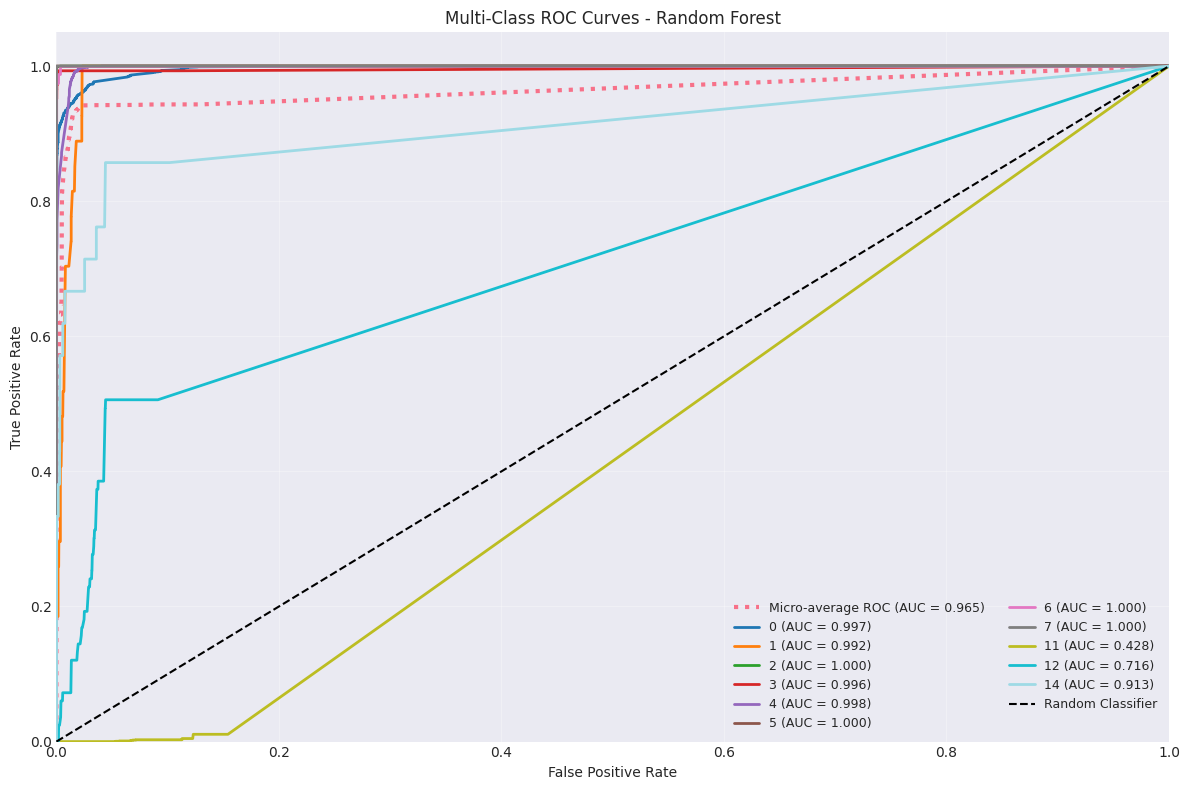

In [ ]:
# Align features to labels if using pandas (no-op for numpy)
X_rf = X_test_sel.loc[y_test.index] if hasattr(X_test_sel, "loc") and hasattr(y_test, "index") else X_test_sel

y_pred_proba_rf = rf.predict_proba(X_rf)
# Optional safety check
assert y_test.shape[0] == y_pred_proba_rf.shape[0], "RF: y_test and proba lengths differ."

plot_multiclass_roc(
    y_true=y_test,
    y_pred_proba=y_pred_proba_rf,
    class_names=list(le_xgb_mc.classes_),
    model_name="Random Forest",
    le=le_xgb_mc
)


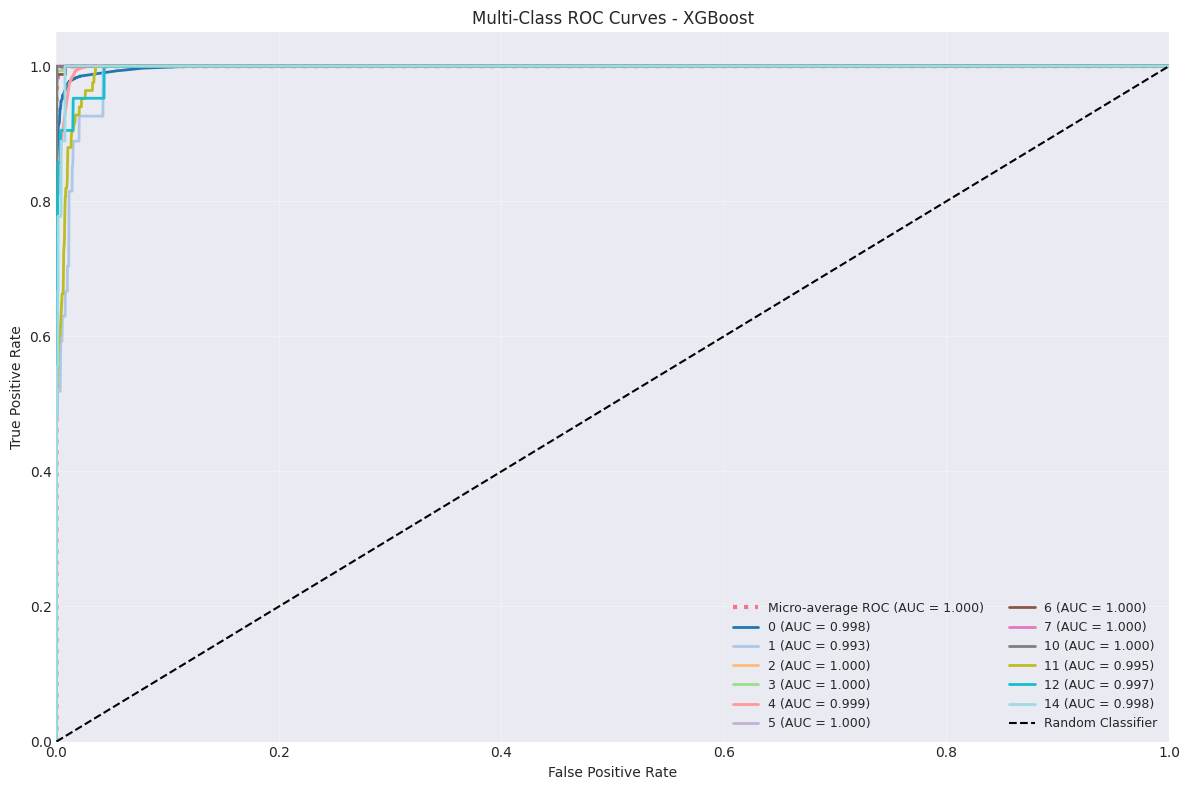

In [ ]:
proba_xgb = booster.predict(dtest)  # shape (n_samples, n_classes)
assert y_test_mc.shape[0] == proba_xgb.shape[0], "XGB: y_test_mc and proba lengths differ."

plot_multiclass_roc(
    y_true=y_test_mc,
    y_pred_proba=proba_xgb,
    class_names=list(le_xgb_mc.classes_),
    model_name="XGBoost",
    le=le_xgb_mc
)



Generating Confusion Matrix for Random Forest (Multiclass)...


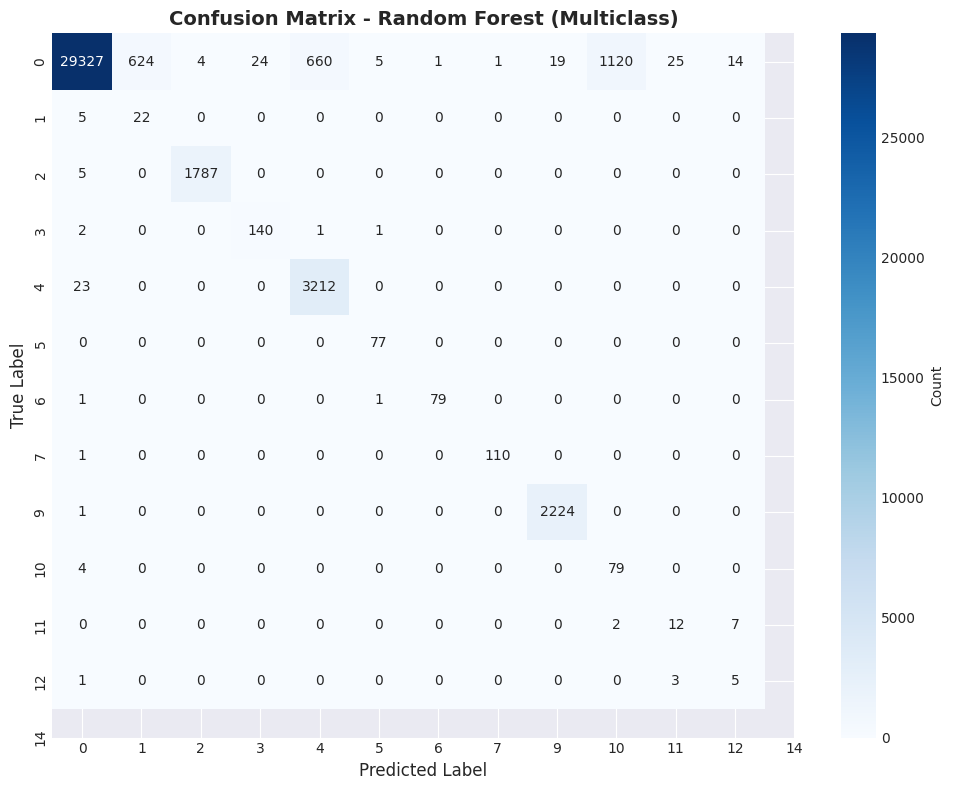


Generating Confusion Matrix for Logistic Regression (Multiclass)...


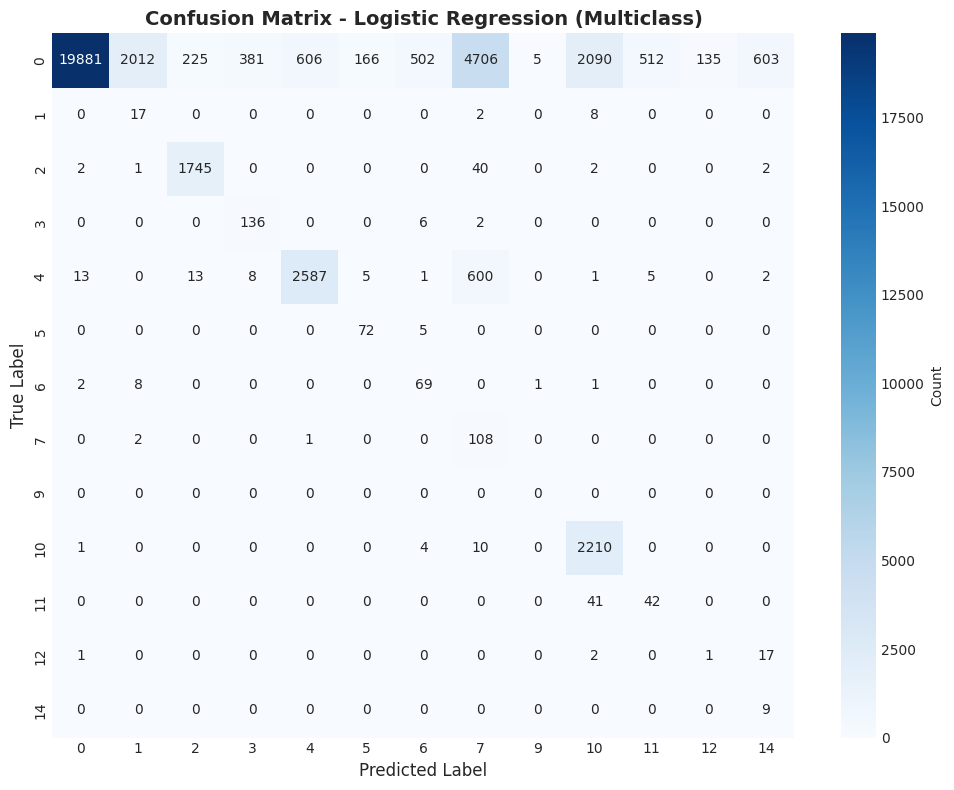


Generating Confusion Matrix for XGBoost (Multiclass)...


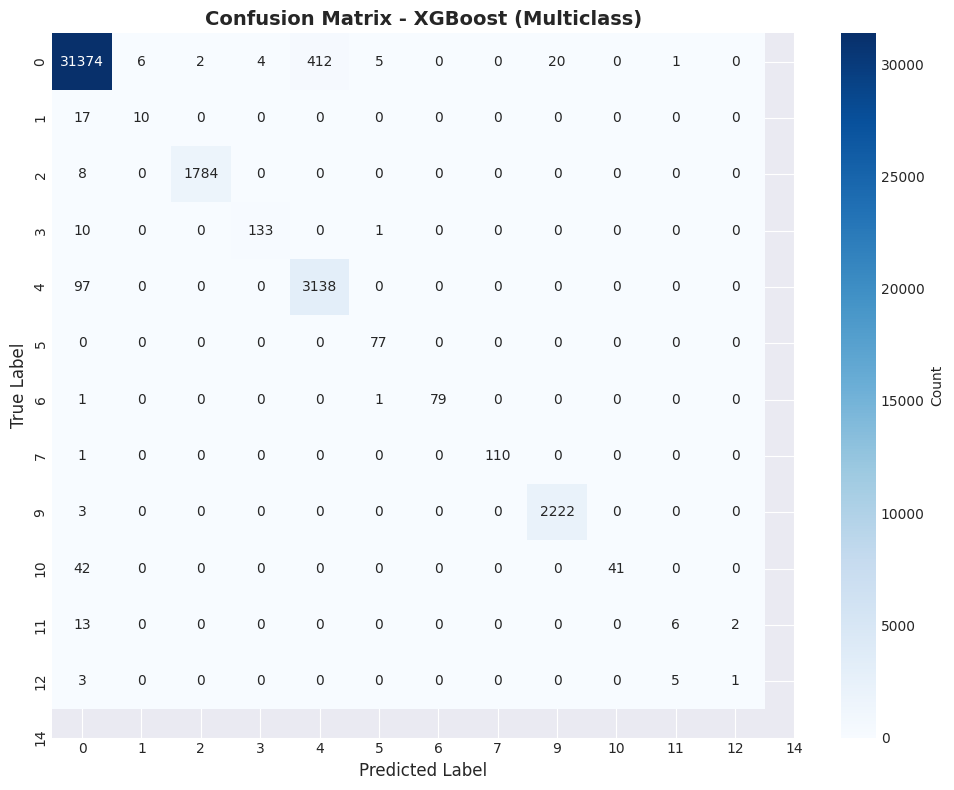


Generating Confusion Matrix for Random Forest (Binary)...


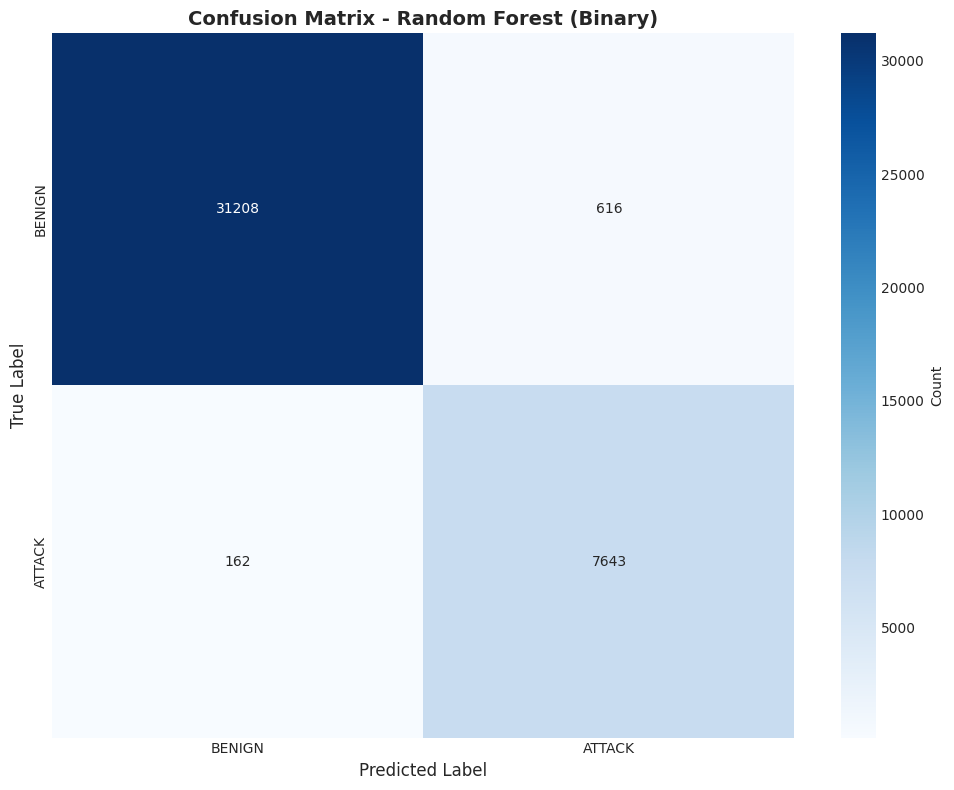


Generating Confusion Matrix for Logistic Regression (Binary)...


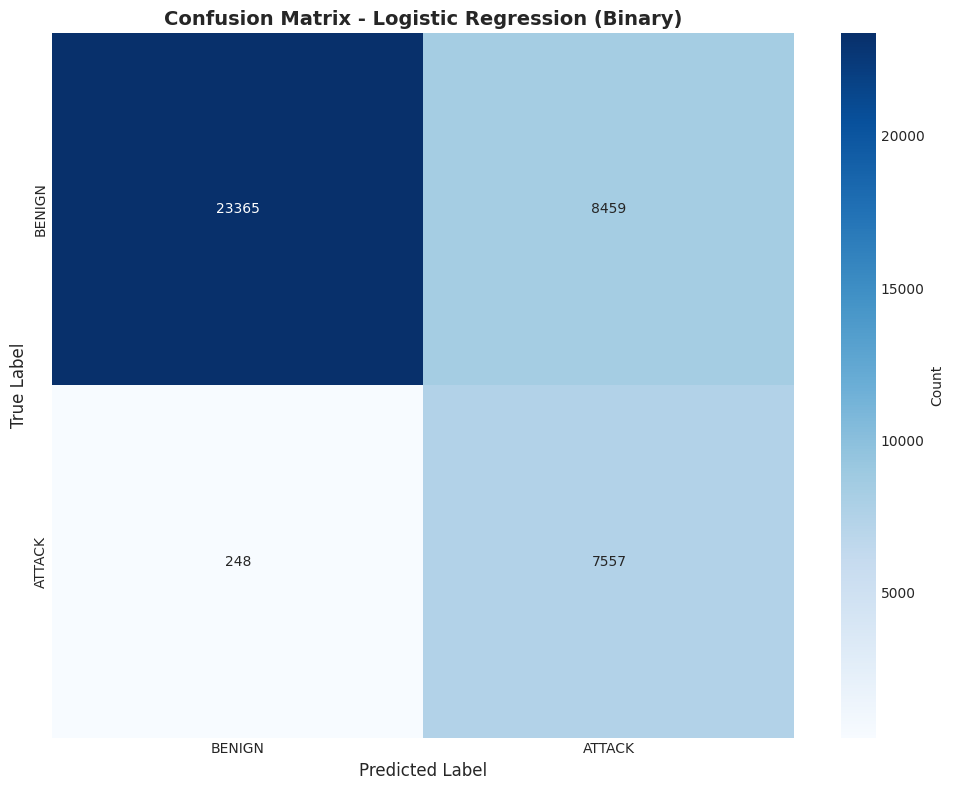


Generating Confusion Matrix for XGBoost (Binary)...


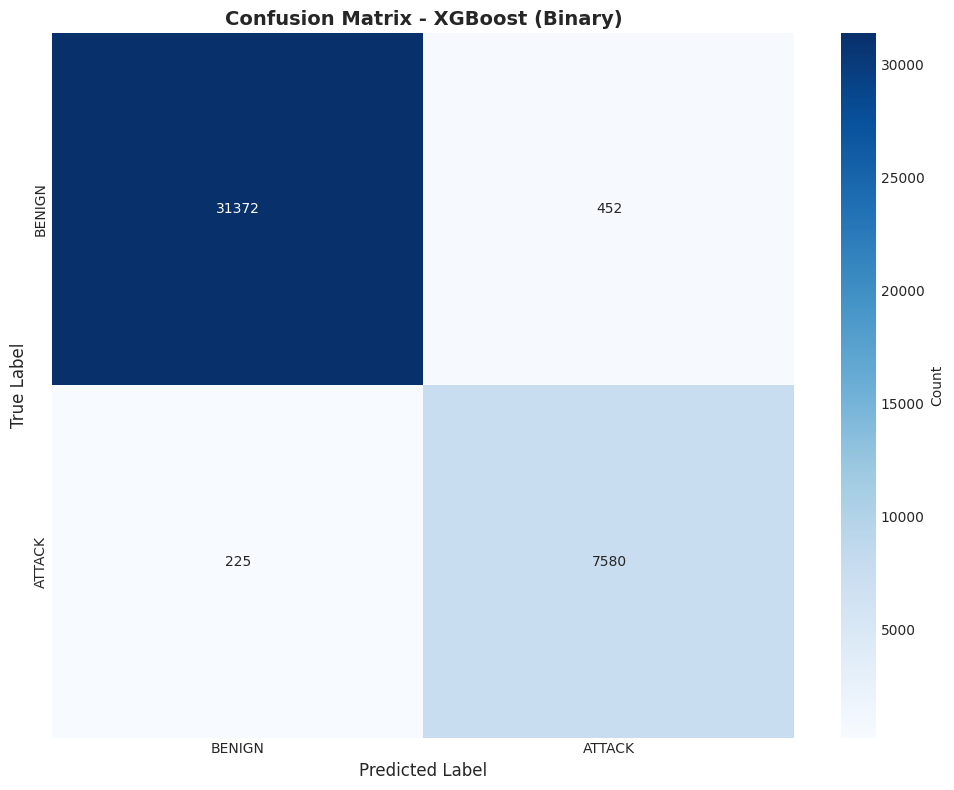

In [ ]:
# ============================================================================
# 2. CONFUSION MATRIX HEATMAPS FOR EACH MODEL
# ============================================================================

def plot_confusion_matrix_heatmap(y_true, y_pred, class_names, model_name, 
                                   normalize=False, figsize=(10, 8)):
    """
    Plot confusion matrix as a heatmap
    
    Parameters:
    -----------
    y_true : array-like
        True labels
    y_pred : array-like
        Predicted labels
    class_names : list
        Names of the classes
    model_name : str
        Name of the model for the title
    normalize : bool
        Whether to normalize the confusion matrix
    figsize : tuple
        Figure size
    """
    from sklearn.metrics import confusion_matrix
    
    cm = confusion_matrix(y_true, y_pred)
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        fmt = '.2%'
        title_suffix = " (Normalized)"
    else:
        fmt = 'd'
        title_suffix = ""
    
    plt.figure(figsize=figsize)
    sns.heatmap(cm, annot=True, fmt=fmt, cmap='Blues', 
                xticklabels=class_names, yticklabels=class_names,
                cbar_kws={'label': 'Count' if not normalize else 'Proportion'})
    plt.xlabel('Predicted Label', fontsize=12)
    plt.ylabel('True Label', fontsize=12)
    plt.title(f'Confusion Matrix - {model_name}{title_suffix}', 
              fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.show()


# Generate confusion matrices for all models

# 1. Random Forest (Multiclass)
print("\nGenerating Confusion Matrix for Random Forest (Multiclass)...")
plot_confusion_matrix_heatmap(y_test, y_pred, 
                               le_xgb_mc.classes_, 
                               "Random Forest (Multiclass)")

# 2. Logistic Regression (Multiclass)
print("\nGenerating Confusion Matrix for Logistic Regression (Multiclass)...")
plot_confusion_matrix_heatmap(y_test, y_pred_lr, 
                               le_xgb_mc.classes_, 
                               "Logistic Regression (Multiclass)")

# 3. XGBoost (Multiclass)
print("\nGenerating Confusion Matrix for XGBoost (Multiclass)...")
plot_confusion_matrix_heatmap(y_test_mc, y_pred_xgb, 
                               le_xgb_mc.classes_, 
                               "XGBoost (Multiclass)")

# 4. Random Forest (Binary)
print("\nGenerating Confusion Matrix for Random Forest (Binary)...")
plot_confusion_matrix_heatmap(y_test_bin, y_pred_bin, 
                               ['BENIGN', 'ATTACK'], 
                               "Random Forest (Binary)")

# 5. Logistic Regression (Binary)
print("\nGenerating Confusion Matrix for Logistic Regression (Binary)...")
plot_confusion_matrix_heatmap(y_test_bin, y_pred_lr_bin, 
                               ['BENIGN', 'ATTACK'], 
                               "Logistic Regression (Binary)")

# 6. XGBoost (Binary)
print("\nGenerating Confusion Matrix for XGBoost (Binary)...")
plot_confusion_matrix_heatmap(y_test_bin, y_pred_xgb_bin, 
                               ['BENIGN', 'ATTACK'], 
                               "XGBoost (Binary)")


SHAP Analysis for Random Forest (Multiclass)

Calculating SHAP values for Random Forest (Multiclass)...
(This may take a few minutes depending on sample size)


<Figure size 1200x800 with 0 Axes>

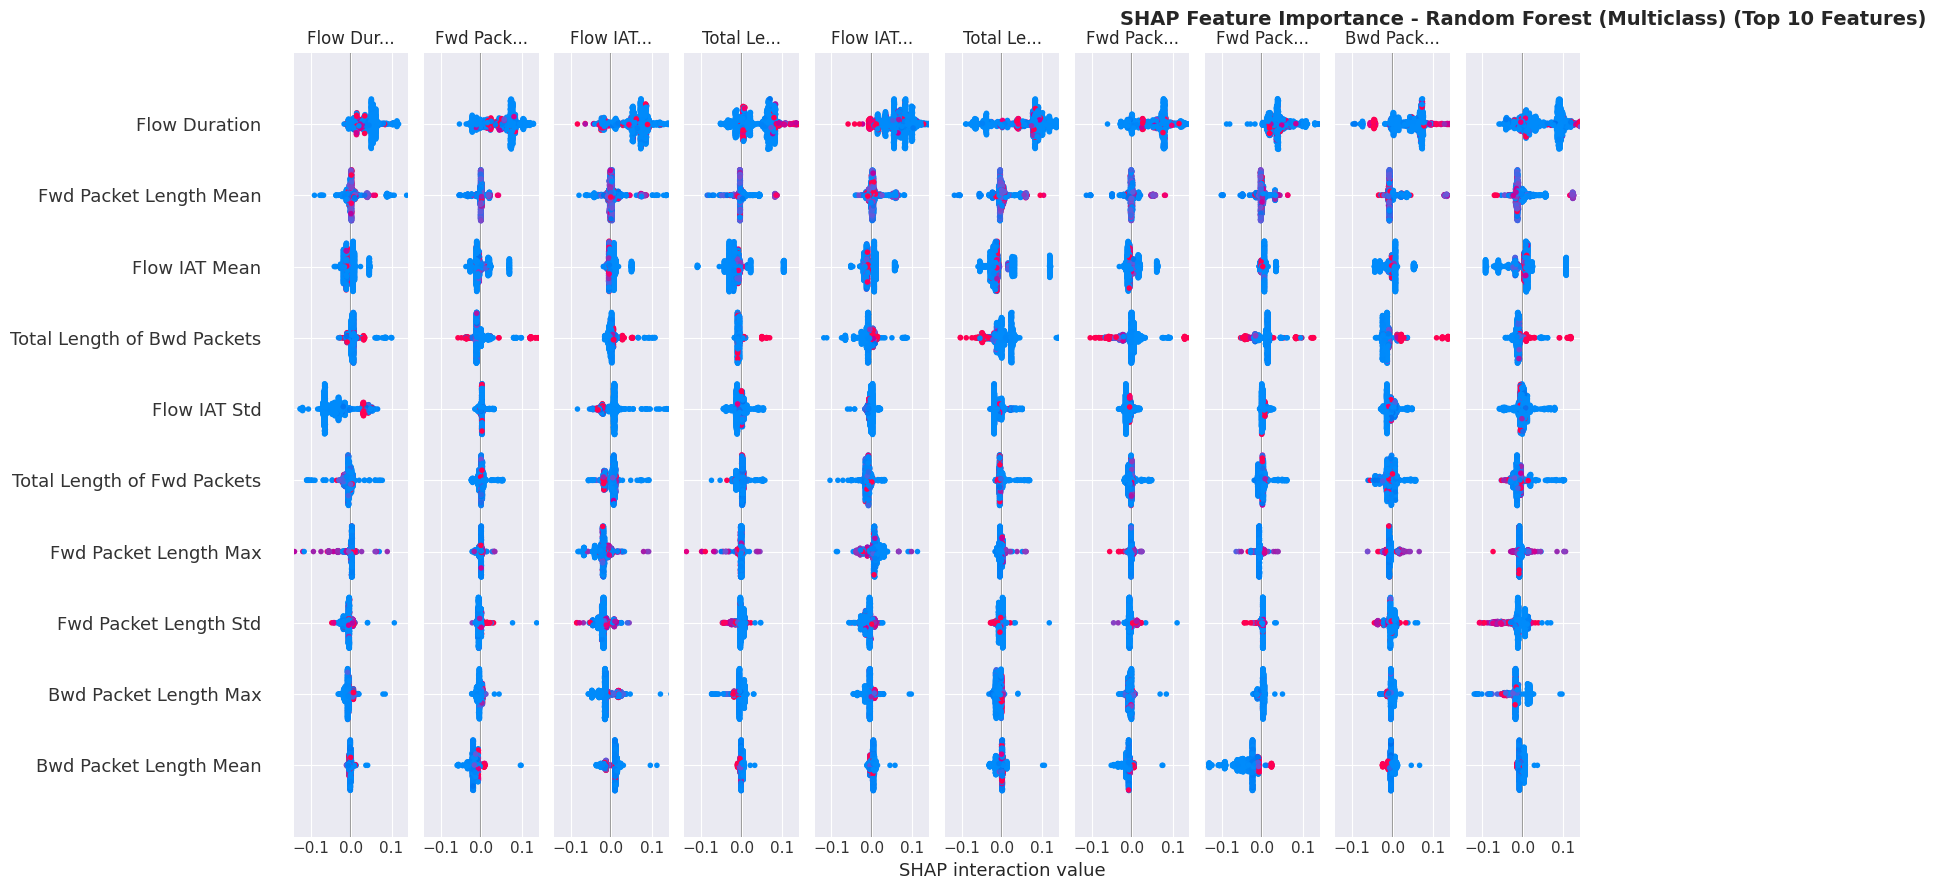


SHAP Analysis for XGBoost (Multiclass)


<Figure size 1200x800 with 0 Axes>

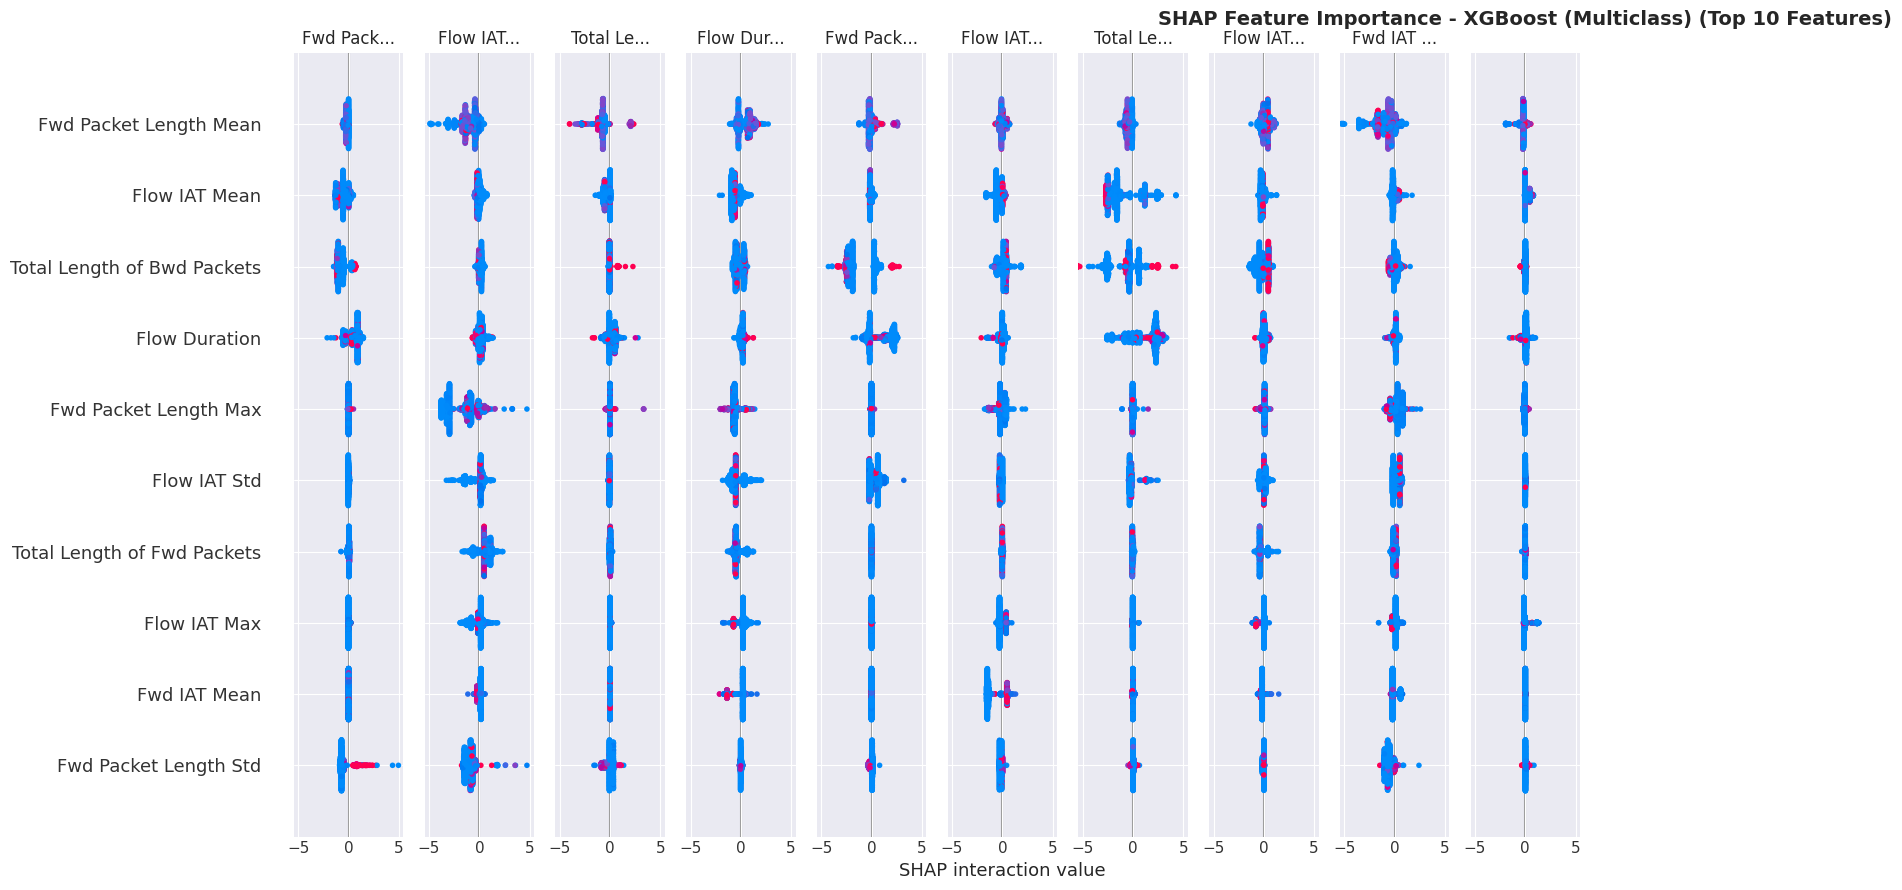


SHAP Analysis for Random Forest (Binary)

Calculating SHAP values for Random Forest (Binary)...
(This may take a few minutes depending on sample size)


<Figure size 1200x800 with 0 Axes>

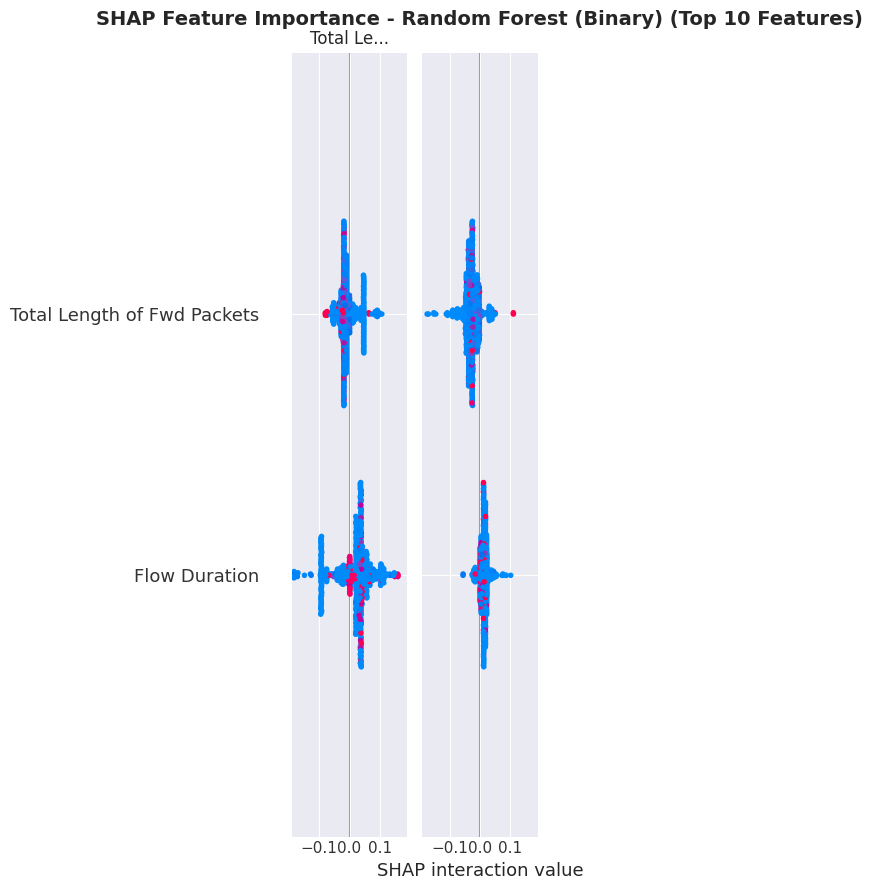


All visualizations generated successfully!


In [ ]:
# ============================================================================
# 3. SHAP SUMMARY PLOT - TOP 10 FEATURES
# ============================================================================

def plot_shap_summary(model, X_sample, feature_names, model_name, 
                      max_display=10, plot_type="dot"):
    """
    Generate SHAP summary plot showing feature importance
    
    Parameters:
    -----------
    model : trained model
        The trained model
    X_sample : array-like
        Sample of training data for SHAP calculation (use subset for speed)
    feature_names : list
        Names of features
    model_name : str
        Name of the model
    max_display : int
        Number of top features to display
    plot_type : str
        Type of SHAP plot ('dot', 'bar', 'violin')
    """
    print(f"\nCalculating SHAP values for {model_name}...")
    print("(This may take a few minutes depending on sample size)")
    
    # Create SHAP explainer
    if hasattr(model, 'predict_proba'):
        explainer = shap.TreeExplainer(model)
    else:
        explainer = shap.Explainer(model, X_sample)
    
    # Calculate SHAP values
    shap_values = explainer.shap_values(X_sample)
    
    # For multi-class, we'll focus on the mean absolute SHAP values across classes
    if isinstance(shap_values, list):
        shap_values = np.abs(shap_values).mean(axis=0)
    
    # Create summary plot
    plt.figure(figsize=(12, 8))
    shap.summary_plot(shap_values, X_sample, 
                      feature_names=feature_names,
                      max_display=max_display,
                      plot_type=plot_type,
                      show=False)
    plt.title(f'SHAP Feature Importance - {model_name} (Top {max_display} Features)', 
              fontsize=14, fontweight='bold', pad=20)
    plt.tight_layout()
    plt.show()
    
    return shap_values


# Sample data for SHAP (use subset to speed up calculation)
# Using 1000 samples is usually sufficient for SHAP analysis
sample_size = min(1000, len(X_train_sel))
X_train_shap = X_train_sel[:sample_size]

# Get feature names from selected features
try:
    selected_feature_names = [X_train.columns[i] for i in selector.get_support(indices=True)]
except:
    selected_feature_names = [f"Feature_{i}" for i in range(X_train_sel.shape[1])]

# Generate SHAP plots for Random Forest (Multiclass)
print("\n" + "="*80)
print("SHAP Analysis for Random Forest (Multiclass)")
print("="*80)
shap_values_rf = plot_shap_summary(rf, X_train_shap, 
                                    selected_feature_names,
                                    "Random Forest (Multiclass)",
                                    max_display=10)

# Generate SHAP plots for XGBoost (Multiclass)
print("\n" + "="*80)
print("SHAP Analysis for XGBoost (Multiclass)")
print("="*80)
# Convert to DMatrix for XGBoost
X_train_shap_xgb = xgb.DMatrix(X_train_shap)
# For XGBoost booster, we need a slightly different approach
explainer_xgb = shap.TreeExplainer(booster)
shap_values_xgb = explainer_xgb.shap_values(X_train_shap)

plt.figure(figsize=(12, 8))
shap.summary_plot(shap_values_xgb, X_train_shap,
                  feature_names=selected_feature_names,
                  max_display=10,
                  show=False)
plt.title('SHAP Feature Importance - XGBoost (Multiclass) (Top 10 Features)', 
          fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

# Generate SHAP plots for Random Forest (Binary)
print("\n" + "="*80)
print("SHAP Analysis for Random Forest (Binary)")
print("="*80)
X_train_shap_bin = X_train_bin_sel[:sample_size]
try:
    selected_feature_names_bin = [X_train_bin.columns[i] for i in selector_bin.get_support(indices=True)]
except:
    selected_feature_names_bin = [f"Feature_{i}" for i in range(X_train_bin_sel.shape[1])]

shap_values_rf_bin = plot_shap_summary(rf_bin, X_train_shap_bin,
                                        selected_feature_names_bin,
                                        "Random Forest (Binary)",
                                        max_display=10)

print("\n" + "="*80)
print("All visualizations generated successfully!")
print("="*80)

GENERATING INDIVIDUAL ROC CURVES FOR BINARY CLASSIFICATION

1. Random Forest (Binary)...


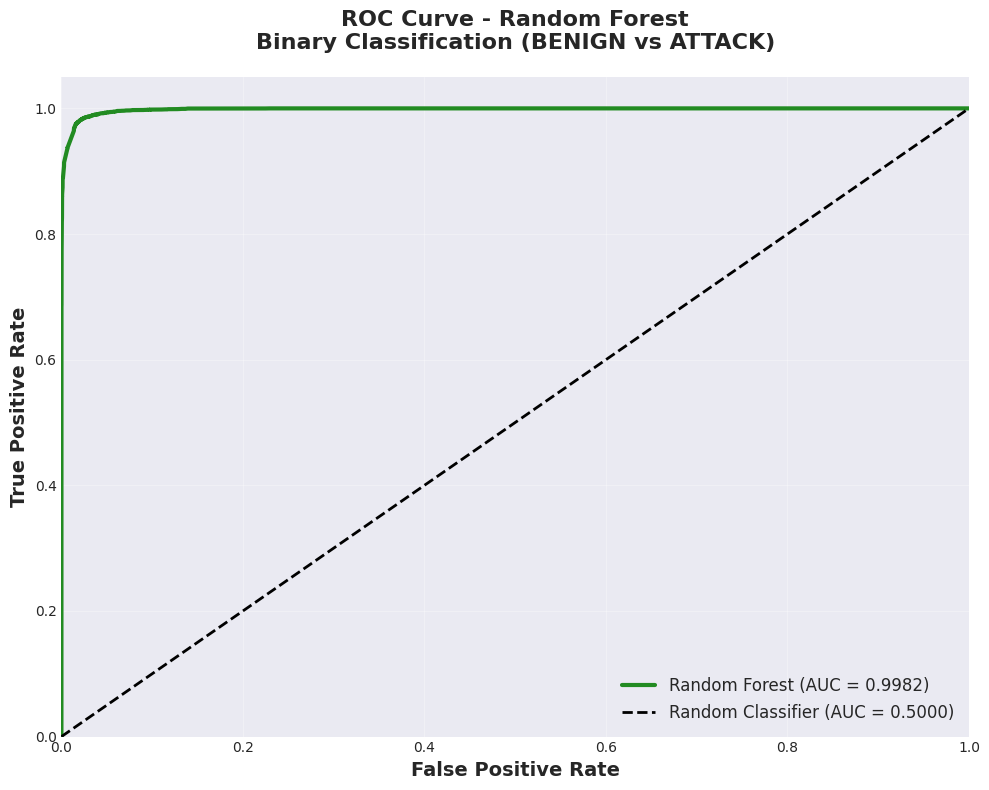


2. Logistic Regression (Binary)...


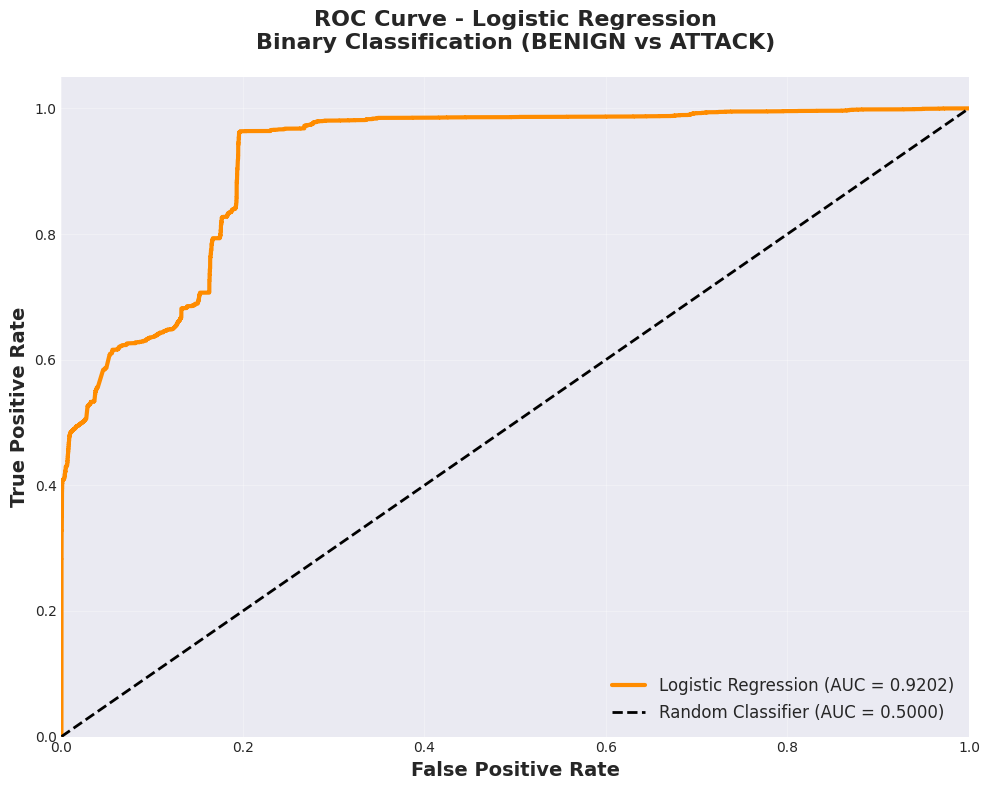


3. XGBoost (Binary)...


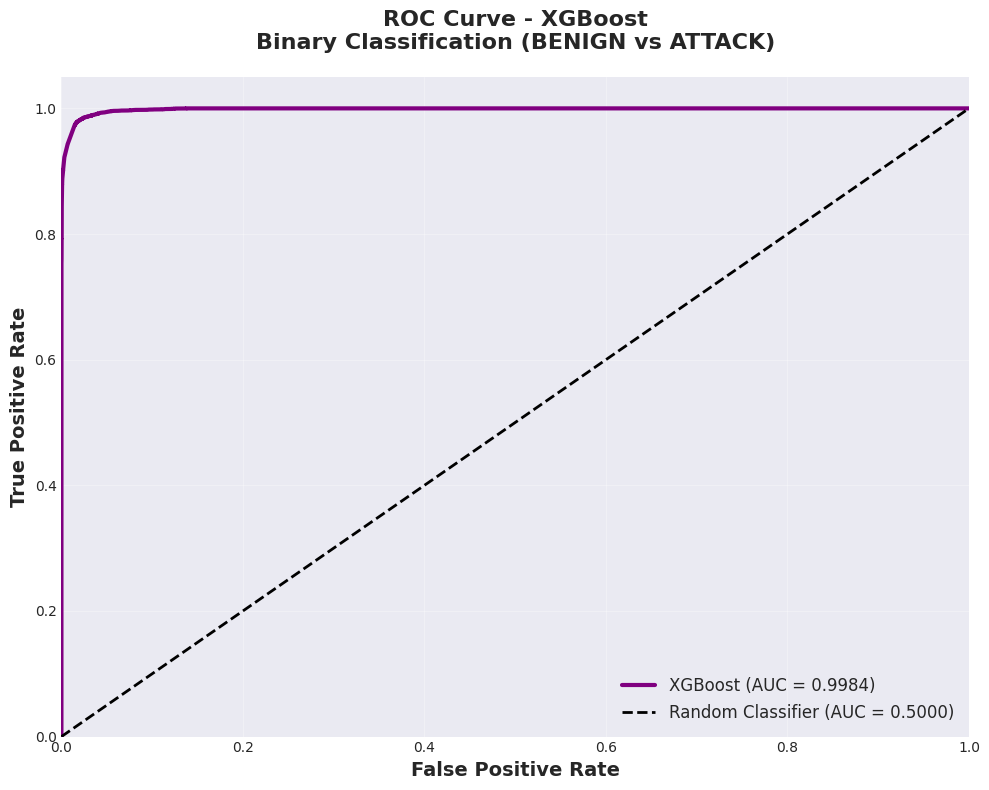

In [ ]:
# ROC Curves for Binary Classification (BENIGN vs ATTACK)
# Comparing Random Forest, Logistic Regression, and XGBoost

import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import roc_curve, auc, RocCurveDisplay

# Set visualization style
plt.style.use('seaborn-v0_8-darkgrid')

# ============================================================================
# OPTION 1: Individual ROC Curves for Each Model
# ============================================================================

def plot_single_roc(y_true, y_score, model_name, color='blue'):
    """
    Plot ROC curve for a single binary classifier
    
    Parameters:
    -----------
    y_true : array-like
        True binary labels
    y_score : array-like
        Predicted probabilities for positive class
    model_name : str
        Name of the model
    color : str
        Color for the ROC curve
    """
    fpr, tpr, thresholds = roc_curve(y_true, y_score)
    roc_auc = auc(fpr, tpr)
    
    plt.figure(figsize=(10, 8))
    plt.plot(fpr, tpr, color=color, lw=3,
             label=f'{model_name} (AUC = {roc_auc:.4f})')
    plt.plot([0, 1], [0, 1], 'k--', lw=2, label='Random Classifier (AUC = 0.5000)')
    
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate', fontsize=14, fontweight='bold')
    plt.ylabel('True Positive Rate', fontsize=14, fontweight='bold')
    plt.title(f'ROC Curve - {model_name}\nBinary Classification (BENIGN vs ATTACK)', 
              fontsize=16, fontweight='bold', pad=20)
    plt.legend(loc="lower right", fontsize=12)
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    return fpr, tpr, roc_auc


# Generate individual ROC curves
print("="*80)
print("GENERATING INDIVIDUAL ROC CURVES FOR BINARY CLASSIFICATION")
print("="*80)

# 1. Random Forest (Binary)
print("\n1. Random Forest (Binary)...")
fpr_rf, tpr_rf, auc_rf = plot_single_roc(
    y_test_bin, y_score_bin, 
    "Random Forest", 
    color='forestgreen'
)

# 2. Logistic Regression (Binary)
print("\n2. Logistic Regression (Binary)...")
fpr_lr, tpr_lr, auc_lr = plot_single_roc(
    y_test_bin, y_score_lr_bin, 
    "Logistic Regression", 
    color='darkorange'
)

# 3. XGBoost (Binary)
print("\n3. XGBoost (Binary)...")
fpr_xgb, tpr_xgb, auc_xgb = plot_single_roc(
    y_test_bin, proba_bin, 
    "XGBoost", 
    color='purple'
)

GENERATING INDIVIDUAL PRECISION-RECALL CURVES

1. Random Forest (Binary)...


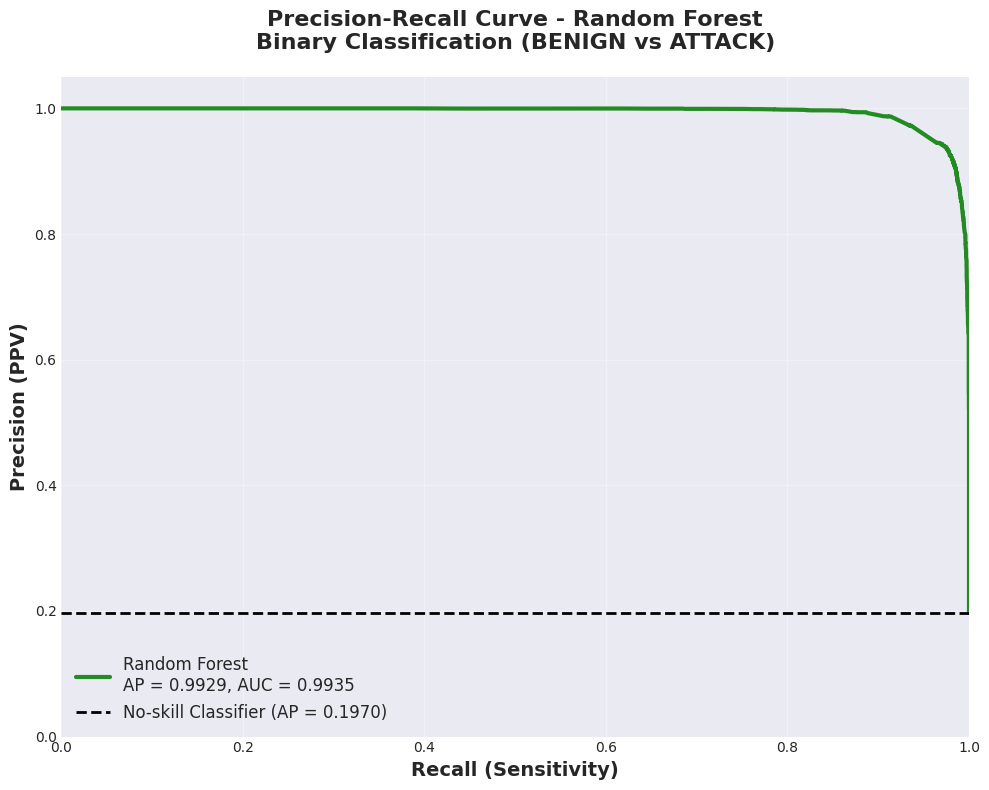


2. Logistic Regression (Binary)...


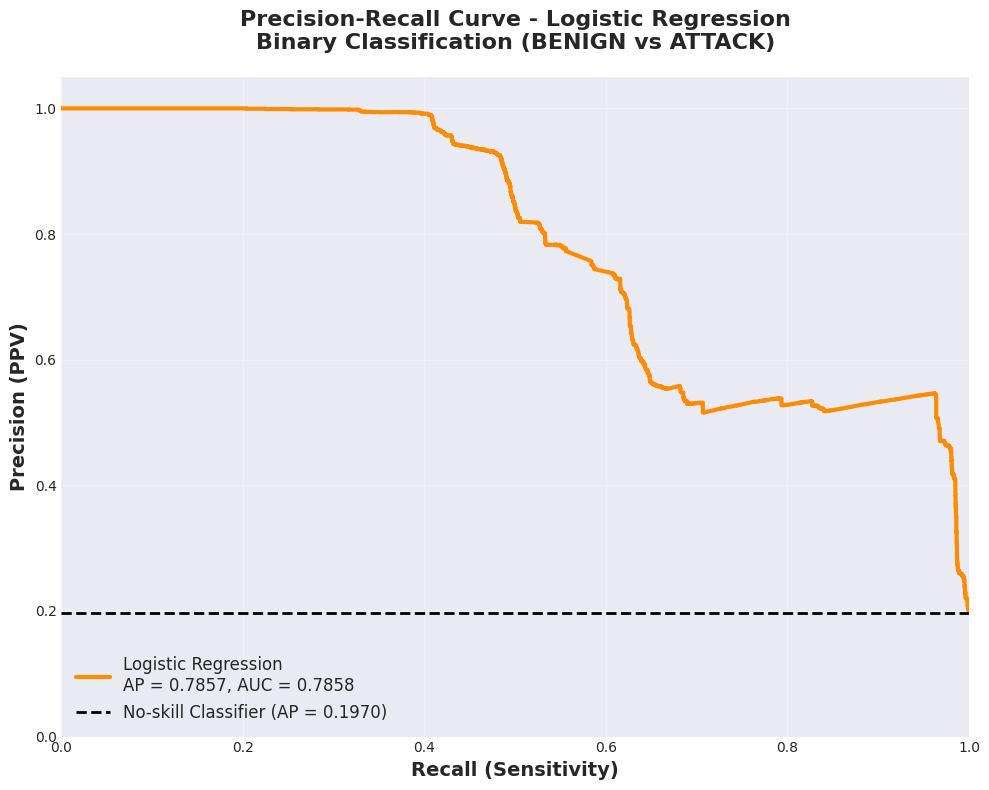


3. XGBoost (Binary)...


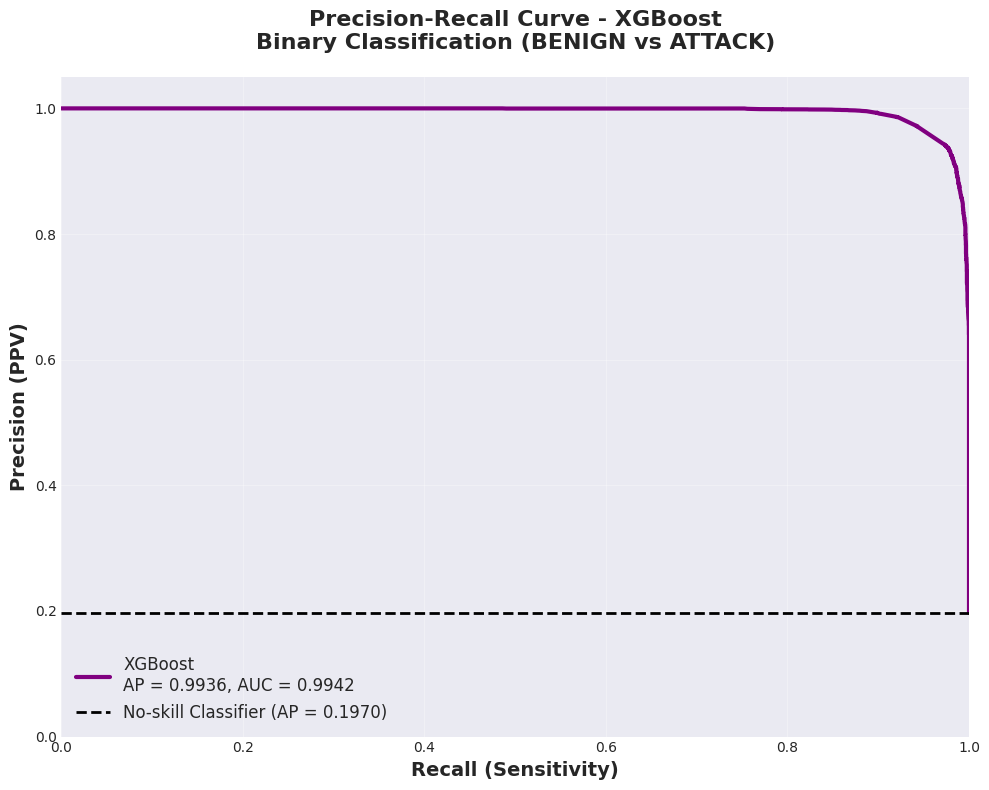

In [ ]:
# Precision-Recall Curves for Binary Classification (BENIGN vs ATTACK)
# Comparing Random Forest, Logistic Regression, and XGBoost

import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import precision_recall_curve, average_precision_score, auc

# Set visualization style
plt.style.use('seaborn-v0_8-darkgrid')

# ============================================================================
# OPTION 1: Individual Precision-Recall Curves for Each Model
# ============================================================================

def plot_single_pr(y_true, y_score, model_name, color='blue'):
    """
    Plot Precision-Recall curve for a single binary classifier
    
    Parameters:
    -----------
    y_true : array-like
        True binary labels
    y_score : array-like
        Predicted probabilities for positive class
    model_name : str
        Name of the model
    color : str
        Color for the PR curve
    """
    precision, recall, thresholds = precision_recall_curve(y_true, y_score)
    avg_precision = average_precision_score(y_true, y_score)
    pr_auc = auc(recall, precision)
    
    # Calculate baseline (no-skill classifier)
    baseline = np.sum(y_true) / len(y_true)
    
    plt.figure(figsize=(10, 8))
    plt.plot(recall, precision, color=color, lw=3,
             label=f'{model_name}\nAP = {avg_precision:.4f}, AUC = {pr_auc:.4f}')
    plt.axhline(y=baseline, color='k', linestyle='--', lw=2,
                label=f'No-skill Classifier (AP = {baseline:.4f})')
    
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Recall (Sensitivity)', fontsize=14, fontweight='bold')
    plt.ylabel('Precision (PPV)', fontsize=14, fontweight='bold')
    plt.title(f'Precision-Recall Curve - {model_name}\nBinary Classification (BENIGN vs ATTACK)', 
              fontsize=16, fontweight='bold', pad=20)
    plt.legend(loc="lower left", fontsize=12)
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    return precision, recall, avg_precision, pr_auc


# Generate individual PR curves
print("="*80)
print("GENERATING INDIVIDUAL PRECISION-RECALL CURVES")
print("="*80)

# 1. Random Forest (Binary)
print("\n1. Random Forest (Binary)...")
prec_rf, rec_rf, ap_rf, pr_auc_rf = plot_single_pr(
    y_test_bin, y_score_bin, 
    "Random Forest", 
    color='forestgreen'
)

# 2. Logistic Regression (Binary)
print("\n2. Logistic Regression (Binary)...")
prec_lr, rec_lr, ap_lr, pr_auc_lr = plot_single_pr(
    y_test_bin, y_score_lr_bin, 
    "Logistic Regression", 
    color='darkorange'
)

# 3. XGBoost (Binary)
print("\n3. XGBoost (Binary)...")
prec_xgb, rec_xgb, ap_xgb, pr_auc_xgb = plot_single_pr(
    y_test_bin, proba_bin, 
    "XGBoost", 
    color='purple'
)
